In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [79]:
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [80]:
b1, b0, r_value, p_value, std_err  = linregress(df['Year'], df['CSIRO Adjusted Sea Level']);
# make predictions
years_extended = np.arange(1880, 2051, 1);
line = [b1*xi + b0 for xi in years_extended]
# yhat = b0 + b1 * df['Year']
df_years

DatetimeIndex(['1880-01-01', '1880-01-02', '1880-01-03', '1880-01-04',
               '1880-01-05', '1880-01-06', '1880-01-07', '1880-01-08',
               '1880-01-09', '1880-01-10',
               ...
               '2049-12-23', '2049-12-24', '2049-12-25', '2049-12-26',
               '2049-12-27', '2049-12-28', '2049-12-29', '2049-12-30',
               '2049-12-31', '2050-01-01'],
              dtype='datetime64[ns]', length=62093, freq='D')

In [81]:
dff=df.copy();
dff = dff[dff['Year'] >= 2000];
dff.count()

Year                        14
CSIRO Adjusted Sea Level    14
Lower Error Bound           14
Upper Error Bound           14
NOAA Adjusted Sea Level     14
dtype: int64

In [84]:
b11, b00, r_value1, p_value1, std_err1  = linregress(dff['Year'], dff['CSIRO Adjusted Sea Level']);
years_extended2 = np.arange(2000, 2051, 1);
line2 = [b11*xi + b00 for xi in years_extended2]

## Create scatter plot

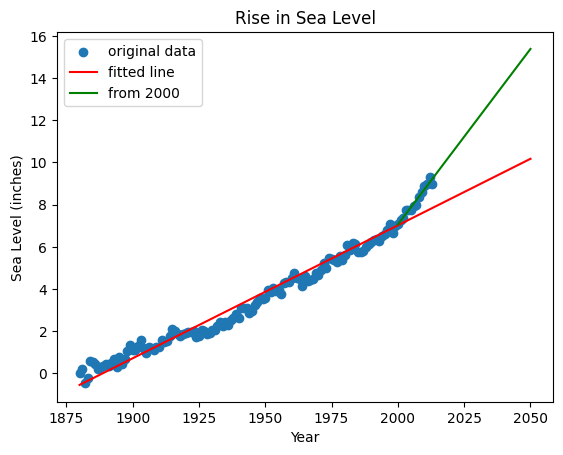

In [85]:
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='original data');
plt.plot(years_extended, line, 'r', label='fitted line');
plt.plot(years_extended2, line2, 'g', label='from 2000');
plt.legend();
plt.xlabel('Year');
plt.ylabel('Sea Level (inches)');
plt.title('Rise in Sea Level');